In [12]:
# import numpy as np
# import pandas as pd

# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler

# import seaborn as sns

# import tensorflow as tf
# from tensorflow import keras

In [13]:
# READ FROM CSV AND CREATE A DATA FRAME

import pandas as pd

df = pd.read_csv('../datasets/diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [14]:
# SPLIT DF_MALE INTO x & Y
# x = INDEPENDENT VARIABLES
# Y = EPENDENT VARIABLES
y = df['Outcome'].copy()
x = df.drop('Outcome', axis="columns")

y.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [15]:
# HANDLE ADTA IMBALANCE - INCREASE/DECREASE ROWS WITH CLASS VALUES(0/1) IF ONE IS LOWER IN NUMBER
# FOR BETTER TRAINING

from imblearn.over_sampling import SMOTE

X_balanced, y_balanced = SMOTE().fit_resample(x, y)
y_balanced.value_counts()

1    500
0    500
Name: Outcome, dtype: int64

In [16]:
# TRAIN-TEST SPLIT
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

x_train, x_test, y_train, y_test = train_test_split(X_balanced, y_balanced, train_size=0.8, random_state=42)

# Scale x with a standard scaler
scaler = StandardScaler()
scaler.fit(x_train)
x_train = pd.DataFrame(scaler.transform(x_train), columns=x.columns)
x_test = pd.DataFrame(scaler.transform(x_test), columns=x.columns)

In [17]:
y_train

29     0
535    1
695    1
557    0
836    1
      ..
106    0
270    1
860    1
435    1
102    0
Name: Outcome, Length: 800, dtype: int64

In [18]:
# TRAIN THE MODEL WITH SVM

from sklearn.svm import SVC # "Support vector classifier"  
model = SVC(C=1000, gamma=0.1, kernel='rbf', random_state=42)  
model.fit(x_train, y_train)  


SVC(C=1000, gamma=0.1, random_state=42)

In [19]:
# HYPER PARAMETER TUNING

# from sklearn.model_selection import GridSearchCV
  
# # defining parameter range
# param_grid = {'C': [0.1, 1, 10, 100, 1000], 
#               'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
#               'kernel': ['rbf']} 
  
# grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
  
# # fitting the model for grid search
# grid.fit(x_train, y_train)

# # print best parameter after tuning
# print(grid.best_params_)
  
# # print how our model looks after hyper-parameter tuning
# print(grid.best_estimator_)

In [20]:
# PREDICT RESULTS

y_pred = model.predict(x_test) 
# train_pred = model.predict(x_train)

pred = model.score(x_test, y_test)
print(f"Accuracy : {pred * 100}%")

Accuracy : 75.5%


Text(95.72222222222221, 0.5, 'Truth')

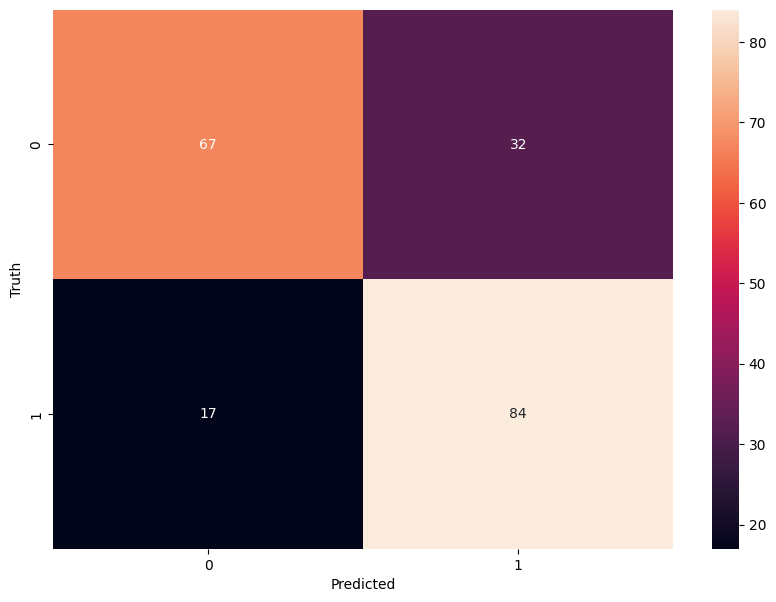

In [21]:
# CONFUSION MATRIX

import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.metrics import confusion_matrix  
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [22]:
# MANUAL CHECKING BY PUTTING ROW VALUES

row = 8
y_pred = model.predict(x_test.iloc[[row]])
res = y_pred[0]
print('prediction => ', res)
print('real => ', y_test.iloc[[row]])

prediction =>  0
real =>  859    1
Name: Outcome, dtype: int64


In [23]:
# SAVING THE MODEL USING PICKLE PACKAGE

import pickle

# save the iris classification model as a pickle file
model_pkl_file = "diabetes-model.pkl"  

with open(model_pkl_file, 'wb') as file:  
    pickle.dump(model, file)

In [25]:
# LOAD AND USE THE SAVED MODEL USING PICKLE PACKAGE
with open(model_pkl_file, 'rb') as file:  
    model = pickle.load(file)

# evaluate model 
y_pred = model.predict(x_test)

# check results
pred = model.score(x_test, y_test)
print(f"Accuracy : {pred * 100}%")

Accuracy : 75.5%
